In [49]:
import numpy as np
import torch
import torchvision
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import json

In [15]:
print('torch version:', torch.__version__)
print("torchvision", torchvision.__version__)

torch version: 1.10.2
torchvision 0.11.3


In [16]:
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)
net.eval()
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [20]:
class BaseTransform():
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([transforms.Resize(resize),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)]
            
        )
    def __call__(self, img):
        return self.base_transform(img)

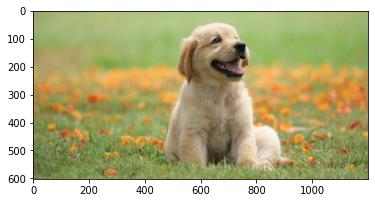

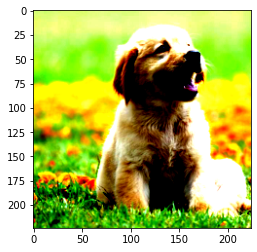

In [22]:
image_file_path ="./data/dog-puppy-on-garden-royalty-free-image-1586966191.jpg"
img = Image.open(image_file_path)

plt.imshow(img)
plt.show()

resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform = BaseTransform(resize, mean, std)  # tao ra transforms
img_transformed = transform(img) # transforms anh input

# (channels, height, width) --> (height, width, channels) 
# clip (0,1)
img_transformed = img_transformed.numpy().transpose(1,2,0)
img_transformed = np.clip(img_transformed,0, 1)

plt.imshow(img_transformed)
plt.show()


In [60]:
class Predictor():
    def __init__(self, class_index):
        self.class_index = class_index
        
    def predict_max(self, out): #out la lớp cuối cùng của lớp vgg16 
        maxid = np.argmax(out.detach().numpy()) # detach tách out ra khỏi netwỏk rồi gán vè dạng numpy
        predicted_label_name = self.class_index[str(maxid)]
        
        return predicted_label_name

In [58]:
class_index = json.load(open('./imagenet_class_index.json', 'r'))

In [62]:
!dir data

 Volume in drive C is Windows 10
 Volume Serial Number is 0C3D-9ADF

 Directory of C:\Users\Admin\Desktop\learn_10Mar\data

03/13/2022  04:44 PM    <DIR>          .
03/13/2022  04:44 PM    <DIR>          ..
03/13/2022  04:43 PM            80,864 dog-puppy-on-garden-royalty-free-image-1586966191.jpg
               1 File(s)         80,864 bytes
               2 Dir(s)  12,515,459,072 bytes free


In [61]:
predictor = Predictor(class_index)

In [68]:
img_file_path = './data/dog-puppy-on-garden-royalty-free-image-1586966191.jpg'
img = Image.open(img_file_path)

resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)
img_transformed = img_transformed.unsqueeze_(0)
# img_transformed.shape

out = net(img_transformed)
result = predictor.predict_max(out)
print("result is: ", result)

result is:  ['n02099601', 'golden_retriever']
